In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
lengths = []

f = open("tapResult.csv", "r")
for x in f:
    words = x.split(',')
    lengths.append(float(words[27]))
unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
x = list(range(0, len(unique)))

plt.plot(x, unique, 'ro-')
plt.show()

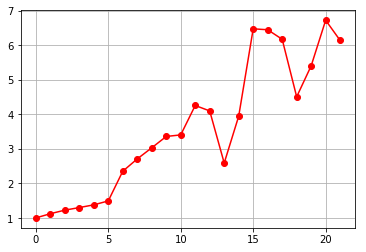

In [25]:
# direction changes only when difference in gain is negative 
lengths = []
gain = []

f = open("tapResultDir.txt", "r")
for x in f:
    words = x.split(',')
    lengths.append(float(words[27]))
    gain.append(float(words[28]))
    
unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
x = list(range(0, len(unique)))

plt.plot(x, unique, 'ro-')
plt.grid(True)
plt.show()

[-1.0, 0.4047887, 0.7485649, 0.5928841, 0.5210888, 0.6614655, 3.352669, 4.238907, 2.422204, 2.320419, 1.340715, 3.320948, 2.568149, 5.211523, 0.5831701, 4.508547, 9.615545, 0.9946543, 7.761145, 2.924929, 1.76258, 3.059164]


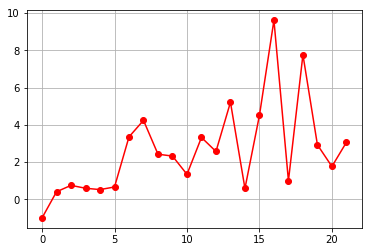

In [27]:

uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
print(uniqueGain)
plt.plot(x, uniqueGain, 'ro-')
plt.grid(True)
plt.show()

[1.0, 1.069556, 1.227841, 1.447379, 1.528941, 1.370851, 1.481477, 1.39029, 1.390403, 1.562582, 1.692689, 1.681202, 1.865259, 2.292695, 1.667972, 1.394581]


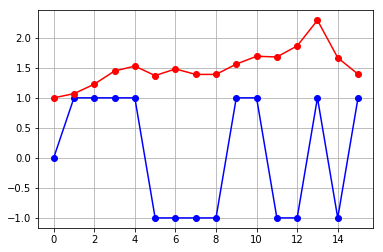

In [48]:
# direction changes only when difference in gain is negative 
lengths = []
gain = []
delta = []
th = []
thNorm = []

f = open("tapResultsNewTh.txt", "r")
for x in f:
    words = x.split(',')
   
    lengths.append(float(words[28]))
    gain.append(float(words[29]))
    delta.append(float(words[30]))
    th.append(float(words[11]))
    thNorm.append(float(words[12]))

unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
print(unique)
x = list(range(0, len(unique)))
uniqueDelta = [np.sign(x) for i, x in enumerate(delta) if i == delta.index(x)]
plt.plot(x, uniqueDelta, 'bo-')
plt.plot(x, unique, 'ro-')
plt.grid(True)
plt.show()

1.220274
3.781104


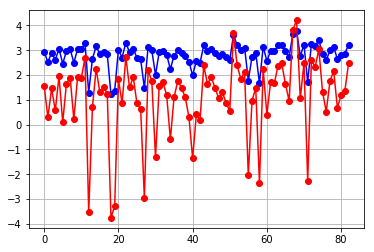

In [50]:
x = list(range(0, len(th)))

print(min(th))
print(max(th))
plt.plot(x, th, 'bo-')
plt.plot(x, thNorm, 'ro-')
plt.grid(True)
plt.show()

[-1.0, 0.2318548, 0.7594689, 1.424735, 1.671894, 1.236383, 0.9316261, 0.617618, 0.6172264, 1.358354, 1.918388, 1.873437, 1.153206, 3.243957, 0.1882025, 1.525461]
[0.0, 0.2318548, 0.5276141, 0.6652665, 0.2471589, -0.435511, -0.3047572, -0.3140081, -0.0003916621, 0.7411273, 0.5600339, -0.04495037, -0.7202315, 2.090751, -3.055755, 1.337258]


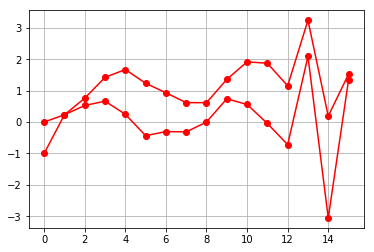

In [40]:
uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
print(uniqueGain)
plt.plot(x, uniqueGain, 'ro-')
plt.grid(True)
#plt.show()

uniqueDelta = [x for i, x in enumerate(delta) if i == delta.index(x)]
plt.plot(x, uniqueDelta, 'ro-')
plt.grid(True)
plt.show()

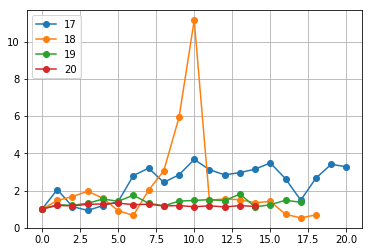

Total time 2.6186666666666665


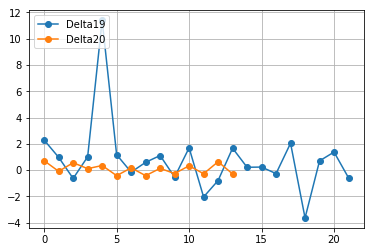

In [26]:
# player 0 = all the shit
# player 1 = something
# player 2 = spiral - random targets
# player 3 = circle - selected targets
# player 4 = spiral - selected targets
# player 5 = circle - selected targets + closer targets
# player 6 = same
# player 7 = 
# player 8 = change effort 
# player 9 = same as 8 

players = [17,18,19,20]
results = []
gradientStats = []
path ="C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResult.csv"
pathA = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResult.csv"
pathStats ="C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResult.csv"
pathStatsA = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\GradientStats.csv"

# read tap results / player
results = [0] * 100
f = open(pathA, "r")
player = -1
for x in f:
    line = x.split(',')
    if len(line) == 31:
        if int(line[0]) == player:
            results[player].append(line)
        else:
            player = int(line[0])
            results[player] = []
            results[player].append(line)

# read gradient results / player
gradientStats = [0] * 100
f = open(pathStatsA, "r")
player = -1
for x in f:
    line = x.split(',')
    if int(line[0]) == player:
        gradientStats[player].append(line)
    else:
        player = int(line[0])
        gradientStats[player] = []
        gradientStats[player].append(line)
f.close()           
            
for p in players:
    tmp = results[p]
    lengths = []
    gain = []
    delta = []
    th = []
    thNorm = []
    totalTime = 0
    for words in tmp:
        totalTime += float(words[10])
        lengths.append(float(words[28]))
        gain.append(float(words[29]))
        delta.append(float(words[30]))
        th.append(float(words[11]))
        thNorm.append(float(words[12]))
        unique = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
       
        x = list(range(0, len(unique)))
        uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
    plt.plot(x, unique, 'o-', label=p)

plt.legend(loc='upper left')
plt.grid(True)
plt.show()
print("Total time", totalTime/60000)

# delta
players = [ 19,20]
for p in players:
    tmp = gradientStats[p]
    gain = []
    prevGain = []
    for words in tmp:
        gain.append(float(words[5]))
        prevGain.append(float(words[4]))

    delta = np.array(gain) - np.array(prevGain)    
    x = list(range(0, len(delta)))
    plt.plot(x, delta, 'o-', label="Delta"+str(p))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


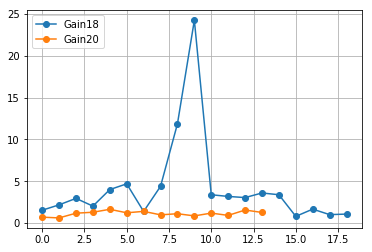

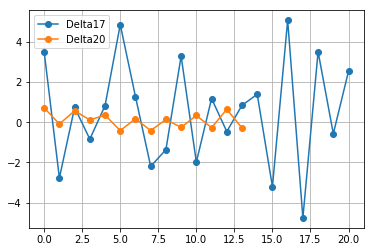

In [34]:
# gain
players = [ 18,20]
for p in players:
    tmp = gradientStats[p]
    learningRate = []
    gain = []
    prevGain = []
    gainEff = []
    gainTh = []
    for words in tmp:
        gain.append(float(words[5]))
        gainTh.append(float(words[3]))
        gainEff.append(float(words[2]))

   
    x = list(range(0, len(gain)))
    plt.plot(x, gain, 'o-', label="Gain"+str(p))
#     plt.plot(x, gainTh, 'o-', label="gainTh"+str(p))
#     plt.plot(x, gainEff, 'o-', label="gainEff"+str(p))
    
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
 
# learning rate
# players = [18,20]
# for p in players:
#     tmp = gradientStats[p]
#     learningRate = []
#     for words in tmp:
#         learningRate.append(float(words[6]))

#     x = list(range(0, len(learningRate)))
#     plt.plot(x, learningRate, 'o-', label=p)
        

# plt.legend(loc='upper left')
# plt.grid(True)
# plt.show()


# delta
players = [17,20]
for p in players:
    tmp = gradientStats[p]
    gain = []
    prevGain = []
    for words in tmp:
        gain.append(float(words[5]))
        prevGain.append(float(words[4]))

    delta = np.array(gain) - np.array(prevGain)
    smallDeltas = delta.toList
    x = list(range(0, len(delta)))
    plt.plot(x, delta, 'o-', label="Delta"+str(p))
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [154]:
# plt.plot(x, uniqueGain, 'go-')
# plt.grid(True)
# plt.show()
# x = list(range(0, len(th)))


# plt.plot(x, th, 'bo-')
# plt.plot(x, thNorm, 'ro-')
# plt.grid(True)
# plt.show()